# AI 投資分析課程-上半堂

##  建構自己的 AI 機器人

### 1️⃣ 使用 OpenAI API 官方套件

OpenAI 官方提供有 openai 套件, 可以簡化使用上的複雜度。

In [ ]:
!pip install openai

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 221.4/221.4 kB 5.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.0/75.0 kB 9.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 76.9/76.9 kB 9.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.3/58.3 kB 6.7 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
llmx 0.0.15a0 requires cohere, which is not installed.
llmx 0.0.15a0 requires tiktoken, which is not installed.


### 2️⃣ 輸入 API KEY
getpass 套件可以隱藏輸入值

In [ ]:
from openai import OpenAI, OpenAIError # OpenAI 官方套件
import getpass # 保密輸入套件
api_key = getpass.getpass("請輸入金鑰：")
client = OpenAI(api_key = api_key) # 建立 OpenAI 物件

請輸入金鑰：··········


### 3️⃣ 建構模型並交談

In [ ]:
reply = client.chat.completions.create(
    model = "gpt-3.5-turbo",
    # model = "gpt-4",
    messages = [
        {"role":"user", "content": "你住的地方很亮嗎？"}
    ]
)

### 4️⃣ 檢視傳回物件

In [ ]:
print(reply)

ChatCompletion(id='chatcmpl-8Si7UPpepHCiZ12loELZfR5fBZprj', choices=[Choice(finish_reason='stop', index=0, message=ChatCompletionMessage(content='很抱歉，我是一個AI，沒有能力感受到周圍的環境。', role='assistant', function_call=None, tool_calls=None))], created=1701853472, model='gpt-3.5-turbo-0613', object='chat.completion', system_fingerprint=None, usage=CompletionUsage(completion_tokens=33, prompt_tokens=21, total_tokens=54))


### 5️⃣ 檢視訊息內容

In [ ]:
print(reply.choices[0].message.content)

很抱歉，我是一個AI，沒有能力感受到周圍的環境。


### 6️⃣ 設定 AI 角色

In [ ]:
reply = client.chat.completions.create(
    model = "gpt-3.5-turbo",
    messages = [
        {"role":"system", "content":"你是隻住在外太空的猴子"},
        {"role":"user", "content": "你住的地方很亮嗎？ reply in 繁體中文"}
    ]
)

print(reply.choices[0].message.content)

我住在外太空的地方是非常黑暗的，因為外太空沒有星球或恆星的光線照射，所以沒有太多的光亮。不過，偶爾會有星系或彗星的亮光經過，使得一些地方變得稍微明亮一些。但整體來說，外太空是相當黑暗的。


### 7️⃣ 寫成函式

In [ ]:
def get_reply(messages):
    try:
        response = client.chat.completions.create(
            model = "gpt-3.5-turbo-1106",
            messages = messages
        )
        reply = response.choices[0].message.content
    except OpenAIError as err:
        reply = f"發生 {err.error.type} 錯誤\n{err.error.message}"
    return reply

### 8️⃣ 簡易的 AI 機器人


In [ ]:
while True:
    msg = input("你說：")
    if not msg.strip(): break
    messages = [{"role":"user", "content":msg}]
    reply = get_reply(messages)
    print(f"ㄟ唉：{reply}\n")

你說：台灣在哪裡
ㄟ唉：台灣位於亞洲東部，大陸東南沿海的台灣海峽西岸，東濱太平洋，包括台灣本島、澎湖群島、金門群島和馬祖列島等島嶼。

你說：日本在哪裡
ㄟ唉：日本位於亞洲東部的一個島國，由四大島（本州、北海道、九州和四國）和超過6000個小島組成。其位於朝鮮半島以東，與中國、韓國以及俄羅斯等國家接壤。

你說：請幫我分析2382廣達的近期趨勢
ㄟ唉：2382廣達是一家台灣的電腦與週邊設備製造公司，近期的趨勢可能受到多個因素的影響。

首先，全球半導體短缺問題可能對廣達的生產和供應鏈產生影響。由於全球半導體供應短缺，許多製造商都在努力應對這一問題，廣達可能也因此受到影響。

其次，全球經濟復甦的速度和效果對於廣達的業務也有重要影響。全球經濟復甦將促進消費者購買電腦和週邊設備的需求，這對於廣達的業務是一個積極的趨勢。

最後，市場競爭和新技術的發展也將對廣達的業務產生影響。廣達需要應對來自其他電腦製造商的競爭，並及時推出符合市場需求的新產品。

總的來說，2382廣達的近期趨勢會受到全球半導體短缺、全球經濟復甦、市場競爭和新技術發展等多重因素的影響，投資者應密切關注相關動向並做好風險控制。



KeyboardInterrupt: ignored

##  輕鬆取得股票資料：yfinance

### 9️⃣ 匯入套件

In [ ]:
!pip install yfinance
import yfinance as yf
import datetime as dt
import pandas as pd

### 🔟 設定股票代碼和起止時間

In [ ]:
# 指定要下載的股票代碼
stock_id = '2330.TW'
# 設定開始與結束時間
end = dt.date.today()
start = end - dt.timedelta(days=360)

### 1️⃣1️⃣ 取得每日股價 (開高低收) 資料


In [ ]:
stock_data = yf.download(stock_id, start=start, end=end)
stock_data.tail()

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2023-11-29,578.0,579.0,570.0,574.0,574.0,24868842
2023-11-30,576.0,577.0,570.0,577.0,577.0,47192647
2023-12-01,573.0,579.0,573.0,579.0,579.0,28051165
2023-12-04,582.0,582.0,571.0,574.0,574.0,26847171
2023-12-05,571.0,572.0,567.0,570.0,570.0,22229723


### 1️⃣2️⃣ 1 分 K 資料

In [ ]:
stock_data = yf.download(stock_id, interval="1m")
stock_data.head()

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Datetime,,,,,,
2023-11-30 09:00:00+08:00,576.0,576.0,573.0,574.0,574.0,0
2023-11-30 09:01:00+08:00,573.0,575.0,573.0,575.0,575.0,265000
2023-11-30 09:02:00+08:00,574.0,575.0,574.0,575.0,575.0,40000
2023-11-30 09:03:00+08:00,575.0,575.0,574.0,575.0,575.0,95000
2023-11-30 09:04:00+08:00,575.0,575.0,574.0,574.0,574.0,78000


### 1️⃣3️⃣ 取得多檔股票的資料

In [ ]:
stocks = [stock_id, '2303.TW', '2454.TW'] # 分別為台積電、聯電和聯發科
stock_data = yf.download(stocks, start=start, end=end)
stock_data.tail()

[*********************100%%**********************]  3 of 3 completed


Adj Close                      Close                       High  \
              2303.TW 2330.TW 2454.TW    2303.TW 2330.TW 2454.TW    2303.TW   
Date                                                                          
2023-11-29  49.200001   574.0   948.0  49.200001   574.0   948.0  49.900002   
2023-11-30  48.900002   577.0   945.0  48.900002   577.0   945.0  49.799999   
2023-12-01  49.700001   579.0   947.0  49.700001   579.0   947.0  49.700001   
2023-12-04  50.200001   574.0   933.0  50.200001   574.0   933.0  50.200001   
2023-12-05  49.200001   570.0   929.0  49.200001   570.0   929.0  49.799999   

                                  Low                       Open          \
           2330.TW 2454.TW    2303.TW 2330.TW 2454.TW    2303.TW 2330.TW   
Date                                                                       
2023-11-29   579.0   949.0  49.150002   570.0   936.0  49.150002   578.0   
2023-11-30   577.0   953.0  48.900002   570.0   939.0  49.299999   576.0   
2023-12-01   579.0   947.0  49.000000   573.0   938.0  49.000000   573.0   
2023-12-04   582.0   946.0  49.799999   571.0   930.0  49.849998   582.0   
2023-12-05   572.0   933.0  49.200001   567.0   921.0  49.799999   571.0   

                      Volume                     
           2454.TW   2303.TW   2330.TW  2454.TW  
Date                                             
2023-11-29   941.0  61999972  24868842  5118355  
2023-11-30   949.0  87291668  47192647  7275320  
2023-12-01   942.0  52316739  28051165  3387061  
2023-12-04   945.0  43958233  26847171  5071102  
2023-12-05   925.0  56578688  22229723  5175120

### 1️⃣4️⃣ 損益表資料

In [ ]:
stock = yf.Ticker(stock_id)

financials = stock.financials
financials

,2022-12-31,2021-12-31,2020-12-31,2019-12-31
Tax Effect Of Unusual Items,380563192.286323,0.0,726475095.042556,5461704.58954
Tax Rate For Calcs,0.111249,0.099609,0.113922,0.114152
Normalized EBITDA,1589774155000.0,1090935401000.0,912206385000.0,679932578000.0
Total Unusual Items,3420820000.0,5785000000.0,6376941000.0,47846000.0
Total Unusual Items Excluding Goodwill,3420820000.0,5785000000.0,6376941000.0,47846000.0
Net Income From Continuing Operation Net Minority Interest,1016530249000.0,588918059000.0,517885387000.0,345263668000.0
Reconciled Depreciation,437254273000.0,422394869000.0,331724691000.0,286884241000.0
Reconciled Cost Of Revenue,915536486000.0,767877771000.0,628108309000.0,577286947000.0
EBITDA,1593194975000.0,1090935401000.0,918583326000.0,679980424000.0
EBIT,1155940702000.0,668540532000.0,586858635000.0,393096183000.0


### 1️⃣5️⃣ 資產負債表

In [ ]:
balance_sheet = stock.balance_sheet
balance_sheet

,2022-12-31,2021-12-31,2020-12-31,2019-12-31
Ordinary Shares Number,25930380458.0,25930380458.0,25930380458.0,25930380458.0
Share Issued,25930380458.0,25930380458.0,25930380458.0,25930380458.0
Total Debt,888174472000.0,749065330000.0,365192370000.0,158664123000.0
Tangible Book Value,2919654040000.0,2141464856000.0,1823889077000.0,1600757096000.0
Invested Capital,3804063570000.0,2896587669000.0,2194288977000.0,1765032414000.0
...,...,...,...,...
Cash Cash Equivalents And Short Term Investments,1586500125000.0,1205072673000.0,802152615000.0,594463727000.0
Other Short Term Investments,243686042000.0,140082481000.0,141981968000.0,139064391000.0
Cash And Cash Equivalents,1342814083000.0,1064990192000.0,660170647000.0,455399336000.0
Cash Equivalents,13522689000.0,6182088000.0,6590099000.0,2664958000.0


##  輕鬆取得股票資料：新聞爬蟲


### 1️⃣6️⃣ 匯入套件

In [ ]:
import requests
from bs4 import BeautifulSoup

### 1️⃣7️⃣ 爬取鉅亨網新聞資料
https://www.cnyes.com/

In [ ]:
# 股票名稱
stock_name = "日月光投控"

# 取得 Json 格式資料
json_data = requests.get(f'https://ess.api.cnyes.com/ess/api/v1/news/keyword?q={stock_name}&limit=20&page=1').json()

# 擷取資料內容
print(json_data)
items=json_data['data']['items']
print(items)

{'statusCode': 200, 'message': 'OK', 'data': {'items': [{'objectType': 'NEWS', 'newsId': 5398254, 'title': '〈台股開盤〉 創今年高後拉回百點翻黑 台積電同步震盪', 'summary': '台積電開高走低 加權指數改寫今年高後同步拉回翻黑', 'category': [{'categoryId': '827', 'name': '台股新聞'}], 'publishAt': 1701653811, 'coverSrc': {'xs': {'src': 'https://cimg.cnyes.cool/prod/news/5398254/xs/c452c228d83c9005db347c12e3cffe29.jpg', 'width': 100, 'height': 56}, 's': {'src': 'https://cimg.cnyes.cool/prod/news/5398254/s/c452c228d83c9005db347c12e3cffe29.jpg', 'width': 180, 'height': 101}, 'm': {'src': 'https://cimg.cnyes.cool/prod/news/5398254/m/c452c228d83c9005db347c12e3cffe29.jpg', 'width': 380, 'height': 214}, 'l': {'src': 'https://cimg.cnyes.cool/prod/news/5398254/l/c452c228d83c9005db347c12e3cffe29.jpg', 'width': 640, 'height': 360}, 'xl': {'src': 'https://cimg.cnyes.cool/prod/news/5398254/xl/c452c228d83c9005db347c12e3cffe29.jpg', 'width': 960, 'height': 540}, 'xxl': {'src': 'https://cimg.cnyes.cool/prod/news/5398254/xl/c452c228d83c9005db347c12e3cffe29.j

### 1️⃣8️⃣ 迴圈抓取新聞內文

In [ ]:
# 預設表格數據和欄位
field=['股名','日期','標題','內容']
data=[]

for item in items:
    # 網址、標題和日期
    news_id = item["newsId"]
    title = item["title"]
    publish_at = item["publishAt"]

    # 使用 UTC 時間格式
    utc_time = dt.datetime.utcfromtimestamp(publish_at)
    formatted_date = utc_time.strftime('%Y-%m-%d')

    # 前往網址擷取內容
    url = requests.get(f'https://news.cnyes.com/news/id/{news_id}').content
    soup = BeautifulSoup(url, 'html.parser')
    p_elements= soup.find_all('p')

    # 提取段落内容
    p=''
    for paragraph in p_elements[4:]:
        p+=paragraph.get_text()
    data.append([stock_name, formatted_date ,title,p])

# 建立表格
df = pd.DataFrame(data,columns=field)
df

,股名,日期,標題,內容
0,日月光投控,2023-12-04,〈台股開盤〉 創今年高後拉回百點翻黑 台積電同步震盪,台股今 (4) 日開盤後上漲 78 點，衝上 17516.61 點，不僅改寫今年新高，也創 ...
1,日月光投控,2023-11-22,〈台股盤後〉權王走疲AI股臉綠 跌106點回測17300點,美股周二收黑，台股今 (22) 日同步下挫，權王台積電領跌，輝達示警中國市場營收恐遭衝擊，拖...
2,日月光投控,2023-11-14,台灣半導體產值Q3季增1成 全年估減11.2%,台灣半導體協會 (TSIA) 今 (14) 日指出，今年第三季台灣整體 IC 產業產值 (含...
3,日月光投控,2023-11-13,外資加碼台積電近百億元 也青睞封測族群,台股今 (13) 日挑戰萬七失利，終場漲幅收斂至 156 點，收在 16839 點，三大法人...
4,日月光投控,2023-11-09,<mark>日月光投控</mark>10月營收562億元 寫一年高點,全球封測龍頭日月光投控 (3711-TW) 今 (9) 日公布 10 月營收 561.67 ...
5,日月光投控,2023-10-30,環旭電子衝刺車用 完成收購泰科汽車無線股權,私募基金 Phi Capital (卓毅資本) 與封測龍頭日月光投控 (3711-TW) 旗...
6,日月光投控,2023-10-26,〈台股盤前要聞〉外資狂砍台股回測萬六、台幣探逾7年新低 今日必看財經新聞,關注台股盤前要聞重點。台股昨 (26) 日在電子三雄持續領跌下，跳水重挫逾 200 點，外資...
7,日月光投控,2023-10-26,〈日月光法說〉本季營收估季增 明年Q1轉正成長,全球封測龍頭日月光投控 (3711-TW)(ASX-US) 今 (26) 日召開法說會，財務...
8,日月光投控,2023-10-26,〈日月光法說〉Q3毛利率回升EPS 2.04元 前三季賺逾半股本,全球封測龍頭日月光投控 (3711-TW) 今 (26) 日召開法說會，並公布第三季財報，受...
9,日月光投控,2023-10-03,愛德萬測試榮獲日月光投控2022最佳供應商獎,半導體測試設備大廠愛德萬測試 (Advantest Corporation) 今 (3) 日...


## 讓 AI 自動計算技術指標

### 1️⃣9️⃣ 讓我們在檢視一次開高低收的股價資料


In [ ]:
stock_id = "3711.TW"
stock_data = yf.download(stock_id, period="6mo")
stock_data.head()

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2023-06-06,117.0,122.0,116.0,121.5,112.778610,41115039
2023-06-07,124.0,127.5,123.0,125.0,116.027374,42850204
2023-06-08,123.5,125.0,122.0,122.5,113.706833,18450551
2023-06-09,124.5,126.5,123.0,126.0,116.955597,20315008
2023-06-12,127.0,127.0,124.5,125.5,116.491486,18925040


### 2️⃣0️⃣ 設定訊息模版

In [ ]:
# 設定 AI 角色, 使其依據使用者需求進行 df 處理
def ai_helper(df, user_msg):

  msg = [{
    "role":
    "system",
    "content":
    f"As a professional code generation robot, \
      I require your assistance in generating Python code \
      based on specific user requirements. To proceed, \
      I will provide you with a dataframe (df) that follows the \
      format {df.columns}. Your task is to carefully analyze the \
      user's requirements and generate the Python code \
      accordingly.Please note that your response should solely \
      consist of the code itself, \
      and no additional information should be included."
  }, {
    "role":
    "user",
    "content":
    f"The user requirement:{user_msg} \n\
       Your task is to develop a Python function named \
      'calculate(df)'. This function should accept a dataframe as \
      its parameter. Ensure that you only utilize the columns \
      present in the dataset, specifically {df.columns}. \
      After processing, the function should return the processed \
      dataframe. Your response should strictly contain the Python \
      code for the 'calculate(df)' function \
      and exclude any unrelated content."
  }]

  reply_data = get_reply(msg)
  cleaned_code = reply_data.replace("```", "")
  cleaned_code = cleaned_code.replace("python", "")

  return cleaned_code

### 2️⃣1️⃣ 計算簡單移動平均線 SMA

In [ ]:
code_str = ai_helper(stock_data, "計算8日MA與13日MA ")
print(code_str)
exec(code_str)
new_df = calculate(stock_data)
new_df.tail()


def calculate(df):
    df['8MA'] = df['Close'].rolling(window=8).mean()
    df['13MA'] = df['Close'].rolling(window=13).mean()
    return df



,Open,High,Low,Close,Adj Close,Volume,8MA,13MA
Date,,,,,,,,
2023-11-30,127.0,128.0,126.0,128.0,128.0,18841204,126.6875,125.961538
2023-12-01,127.0,128.5,126.5,128.0,128.0,9884517,126.8125,126.307692
2023-12-04,129.0,131.0,129.0,130.0,130.0,10524967,127.2500,126.615385
2023-12-05,129.0,130.0,128.0,129.5,129.5,11565276,127.5625,126.961538
2023-12-06,128.5,129.0,127.0,129.0,129.0,8215789,127.8750,127.230769


### 2️⃣2️⃣ 計算 MACD

In [ ]:
code_str = ai_helper(stock_data, "先計算 EMA 再計算 MACD, 欄位名稱用 MACD_Histogram 命名")
print(code_str)
exec(code_str)
new_df = calculate(stock_data)
new_df.tail()


def calculate(df):
    df['12EMA'] = df['Close'].ewm(span=12, adjust=False).mean()
    df['26EMA'] = df['Close'].ewm(span=26, adjust=False).mean()
    df['MACD'] = df['12EMA'] - df['26EMA']
    df['Signal line'] = df['MACD'].ewm(span=9, adjust=False).mean()
    df['MACD_Histogram'] = df['MACD'] - df['Signal line']
    return df



,Open,High,Low,Close,Adj Close,Volume,8MA,13MA,12EMA,26EMA,MACD,Signal line,MACD_Histogram
Date,,,,,,,,,,,,,
2023-11-30,127.0,128.0,126.0,128.0,128.0,18841204,126.6875,125.961538,125.404411,122.430829,2.973581,2.862464,0.111117
2023-12-01,127.0,128.5,126.5,128.0,128.0,9884517,126.8125,126.307692,125.803732,122.843361,2.960372,2.882046,0.078326
2023-12-04,129.0,131.0,129.0,130.0,130.0,10524967,127.2500,126.615385,126.449312,123.373482,3.075830,2.920803,0.155027
2023-12-05,129.0,130.0,128.0,129.5,129.5,11565276,127.5625,126.961538,126.918648,123.827298,3.091350,2.954912,0.136438
2023-12-06,128.5,129.0,127.0,129.0,129.0,8215789,127.8750,127.230769,127.238856,124.210461,3.028395,2.969609,0.058786


### 2️⃣3️⃣ 計算 RSI

In [ ]:
code_str = ai_helper(stock_data, "計算 RSI ")
print(code_str)
exec(code_str)
new_df = calculate(stock_data)
new_df.tail()


def calculate(df):
    delta = df['Close'].diff()
    gain = delta.where(delta > 0, 0)
    loss = -delta.where(delta < 0, 0)
    avg_gain = gain.rolling(window=14, min_periods=1).mean()
    avg_loss = loss.rolling(window=14, min_periods=1).mean()
    rs = avg_gain / avg_loss
    df['RSI'] = 100 - (100 / (1 + rs))
    return df



,Open,High,Low,Close,Adj Close,Volume,8MA,13MA,12EMA,26EMA,MACD,Signal line,MACD_Histogram,RSI
Date,,,,,,,,,,,,,,
2023-11-30,127.0,128.0,126.0,128.0,128.0,18841204,126.6875,125.961538,125.404411,122.430829,2.973581,2.862464,0.111117,76.923077
2023-12-01,127.0,128.5,126.5,128.0,128.0,9884517,126.8125,126.307692,125.803732,122.843361,2.960372,2.882046,0.078326,68.965517
2023-12-04,129.0,131.0,129.0,130.0,130.0,10524967,127.2500,126.615385,126.449312,123.373482,3.075830,2.920803,0.155027,70.967742
2023-12-05,129.0,130.0,128.0,129.5,129.5,11565276,127.5625,126.961538,126.918648,123.827298,3.091350,2.954912,0.136438,62.962963
2023-12-06,128.5,129.0,127.0,129.0,129.0,8215789,127.8750,127.230769,127.238856,124.210461,3.028395,2.969609,0.058786,65.384615


### 2️⃣4️⃣ 計算布林通道

In [ ]:
code_str = ai_helper(stock_data, "請計算1.5個標準差的布林通道, 欄位以Upper_Band和Lower_Band命名")
print(code_str)
exec(code_str)
new_df = calculate(stock_data)
new_df.tail()


def calculate(df):
    df['Upper_Band'] = df['Close'] + 1.5 * df['Close'].rolling(window=20).std()
    df['Lower_Band'] = df['Close'] - 1.5 * df['Close'].rolling(window=20).std()
    return df



,Open,High,Low,Close,Adj Close,Volume,8MA,13MA,12EMA,26EMA,MACD,Signal line,MACD_Histogram,RSI,Upper_Band,Lower_Band
Date,,,,,,,,,,,,,,,,
2023-11-30,127.0,128.0,126.0,128.0,128.0,18841204,126.6875,125.961538,125.404411,122.430829,2.973581,2.862464,0.111117,76.923077,133.936880,122.063120
2023-12-01,127.0,128.5,126.5,128.0,128.0,9884517,126.8125,126.307692,125.803732,122.843361,2.960372,2.882046,0.078326,68.965517,133.758803,122.241197
2023-12-04,129.0,131.0,129.0,130.0,130.0,10524967,127.2500,126.615385,126.449312,123.373482,3.075830,2.920803,0.155027,70.967742,135.785346,124.214654
2023-12-05,129.0,130.0,128.0,129.5,129.5,11565276,127.5625,126.961538,126.918648,123.827298,3.091350,2.954912,0.136438,62.962963,134.976189,124.023811
2023-12-06,128.5,129.0,127.0,129.0,129.0,8215789,127.8750,127.230769,127.238856,124.210461,3.028395,2.969609,0.058786,65.384615,133.936705,124.063295


## 資料視覺化

### 2️⃣5️⃣ 安裝及匯入套件

In [ ]:
import matplotlib.pyplot as plt
!pip install mplfinance
import mplfinance as mpf

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.0/75.0 kB 1.9 MB/s eta 0:00:00


### 2️⃣6️⃣ 讓我們再一次檢視資料格式

In [ ]:
new_df = new_df.reset_index() # 重設 index
new_df['Date'] = pd.to_datetime(new_df['Date']) # 將 Date 轉換為 datetime 類別
new_df.tail()

,Date,Open,High,Low,Close,Adj Close,Volume,8MA,13MA,12EMA,26EMA,MACD,Signal line,MACD_Histogram,RSI,Upper_Band,Lower_Band
121,2023-11-30,127.0,128.0,126.0,128.0,128.0,18841204,126.6875,125.961538,125.404411,122.430829,2.973581,2.862464,0.111117,76.923077,133.936880,122.063120
122,2023-12-01,127.0,128.5,126.5,128.0,128.0,9884517,126.8125,126.307692,125.803732,122.843361,2.960372,2.882046,0.078326,68.965517,133.758803,122.241197
123,2023-12-04,129.0,131.0,129.0,130.0,130.0,10524967,127.2500,126.615385,126.449312,123.373482,3.075830,2.920803,0.155027,70.967742,135.785346,124.214654
124,2023-12-05,129.0,130.0,128.0,129.5,129.5,11565276,127.5625,126.961538,126.918648,123.827298,3.091350,2.954912,0.136438,62.962963,134.976189,124.023811
125,2023-12-06,128.5,129.0,127.0,129.0,129.0,8215789,127.8750,127.230769,127.238856,124.210461,3.028395,2.969609,0.058786,65.384615,133.936705,124.063295


### 2️⃣7️⃣ 使用 matplotlib 畫出收盤價的折線圖

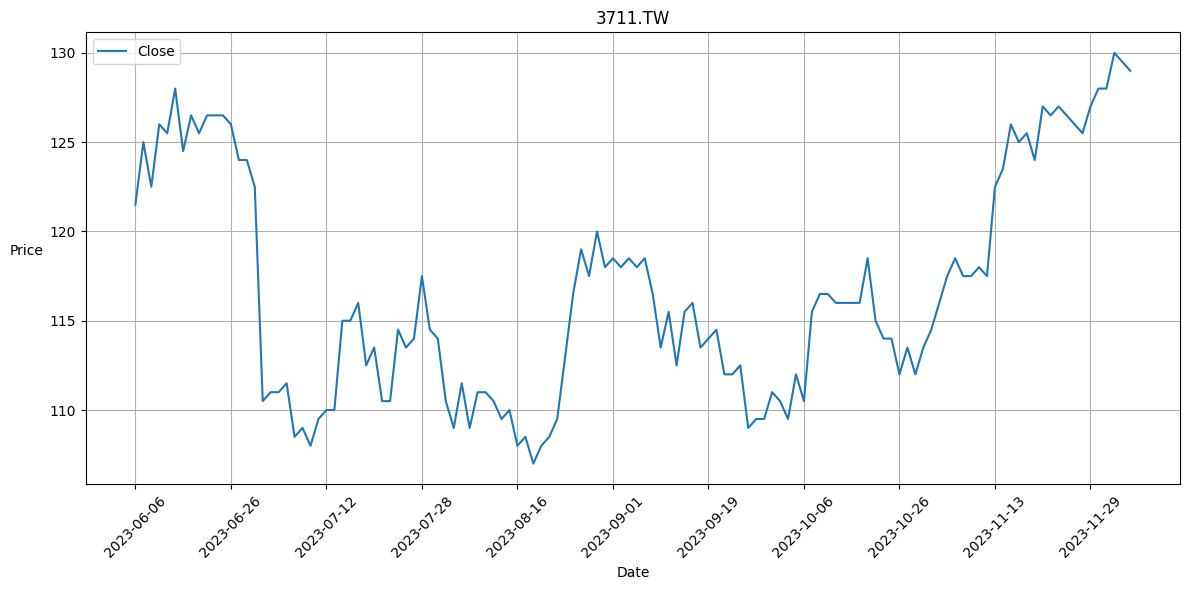

In [ ]:
# 畫布尺寸大小設定
plt.figure(figsize=(12, 6))

# 設定要繪製的資料欄位
plt.plot(new_df['Close'], label='Close')

# 設定 x 軸的時間
num = 10
date = new_df["Date"].dt.strftime('%Y-%m-%d')
plt.xticks(date[::len(date)//num].index,
           date[::len(date)//num], rotation = 45)

# 設定圖表的標題，x 軸和 y 軸的標籤
plt.title(f'{stock_id}')   # 將股票代號設為圖標
plt.xlabel('Date')         # x 軸標籤
plt.ylabel('Price', rotation=0, ha='right')  # y 軸標籤
plt.legend(loc='upper left') # 在左上角顯示圖例
plt.grid(True) # 在圖上顯示網格
plt.tight_layout()

# 顯示圖表
plt.show()

### 2️⃣8️⃣ 加入成交量與技術指標

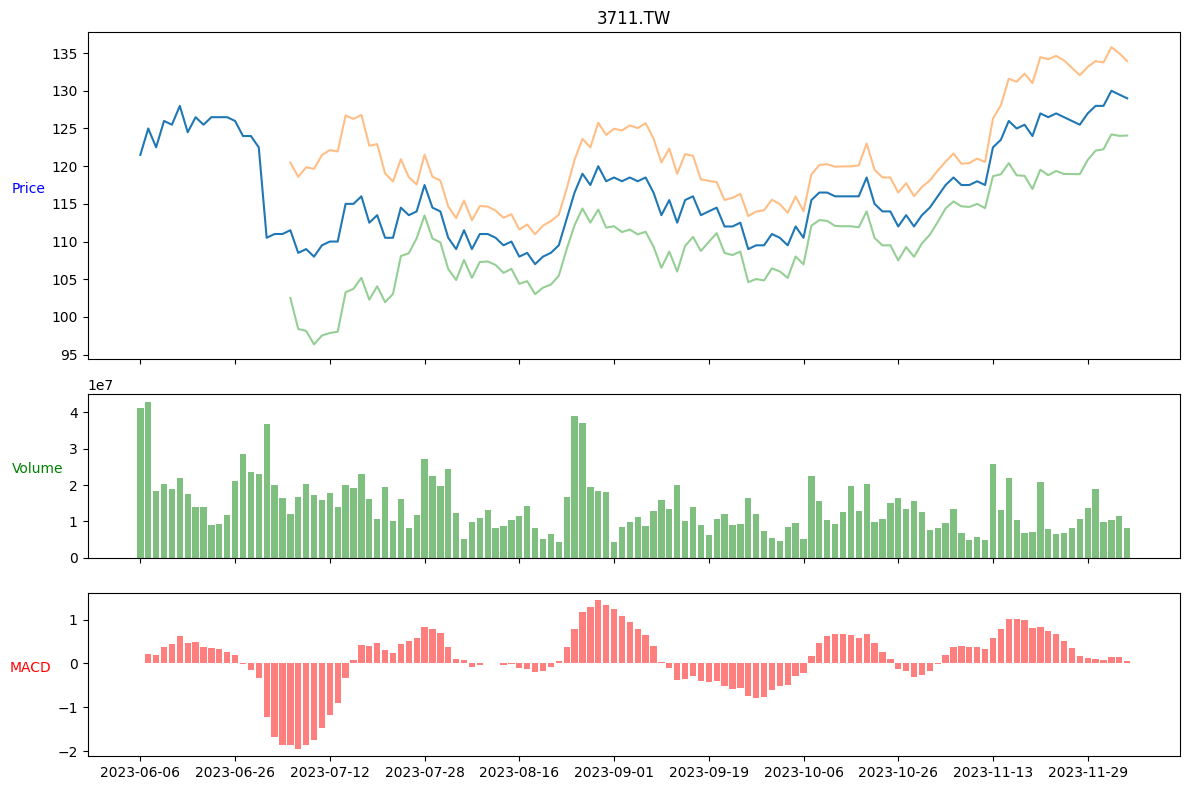

In [ ]:
# 創建三個子圖
fig, (ax1, ax2, ax3) = plt.subplots(3, 1,
                    figsize=(12, 8),
                    gridspec_kw={'height_ratios': [2, 1, 1]},
                    sharex=True)

# 設定 x 軸時間
num = 10
date = new_df["Date"].dt.strftime('%Y-%m-%d')

# 繪製收盤價
ax1.plot(new_df['Close'], label='Close')
# 加入布林通道
ax1.plot(new_df['Upper_Band'], alpha=0.5) # alpha 設定透明度
ax1.plot(new_df['Lower_Band'], alpha=0.5)
ax1.set_title(f'{stock_id}')
ax1.set_ylabel('Price', color='blue', rotation=0, ha='right')
ax1.set_xticks(date[::len(date)//num].index)
ax1.set_xticklabels(date[::len(date)//num])

# 繪製交易量
ax2.bar(new_df.index, new_df['Volume'], alpha=0.5, color='green')
ax2.set_ylabel('Volume', color='green', rotation=0, ha='right')

# 繪製技術指標
ax3.bar(new_df.index, new_df['MACD_Histogram'], alpha=0.5, color='red')
ax3.set_ylabel('MACD', color='red', rotation=0, ha='right')

# 調整子圖間的距離
plt.tight_layout()

# 顯示圖表
plt.show()

### 2️⃣9️⃣ 用 mplfinance 繪製 K 線圖

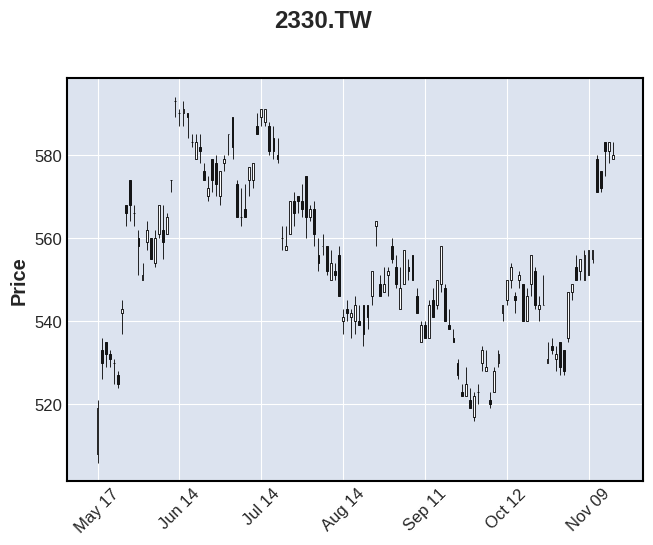

In [ ]:
kplot_df = new_df.set_index('Date')
mpf.plot(kplot_df, type='candle', title=f'{stock_id}')

### 3️⃣0️⃣  加入繪圖設定 & 同時繪製多個子圖

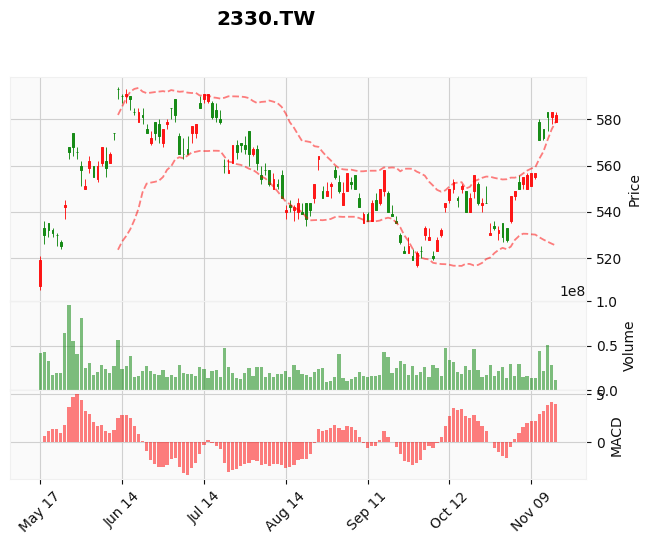

In [ ]:
# 設置繪圖風格
my_color = mpf.make_marketcolors(up='r', down='g', inherit=True)
my_style = mpf.make_mpf_style(base_mpf_style='yahoo',
                marketcolors=my_color)

# 交易量和技術指標子圖
ap = [
    # 上軌線
    mpf.make_addplot(kplot_df['Upper_Band'], color='red',
                      alpha=0.5, linestyle='--'),
    # 下軌線
    mpf.make_addplot(kplot_df['Lower_Band'], color='red',
                     alpha=0.5, linestyle='--'),
    # 成交量
    mpf.make_addplot(kplot_df['Volume'], panel=1, type='bar',
                     color='g', alpha=0.5, ylabel='Volume'),
    # MACD
    mpf.make_addplot(kplot_df['MACD_Histogram'], panel=2, type='bar',
                     color='r', alpha=0.5, ylabel='MACD')
]

# 使用 mplfinance 繪製 K 線圖
mpf.plot(kplot_df, type='candle', addplot=ap,
          style=my_style, title=f'{stock_id}')

## 互動式 K 線圖

### 3️⃣1️⃣ 匯入 plotly 套件

In [ ]:
import plotly.graph_objects as go

### 3️⃣2️⃣ 繪製互動式 K 線圖

In [ ]:
# 創建 K 線圖
fig = go.Figure(data=[go.Candlestick(x=kplot_df.index,
            open=kplot_df['Open'],
            high=kplot_df['High'],
            low=kplot_df['Low'],
            close=kplot_df['Close'],
            increasing_line_color='red',
            decreasing_line_color='green')])

# 調整寬高
fig.update_layout(
    height=800,
    width=1200
)

# 顯示圖表
fig.show()

## Replit 專案：Dash 應用程式

https://replit.com/@flagtech/StkDash